### Project Name: Flight Prediction Analysis

### Project Objective:
- The number of people who fly has dramatically increased in recent years. Pricing alters dynamically owing to many variables, making it difficult for airlines to maintain prices. As a result, we will attempt to solve this problem by cleaning, preparing and analysing the flight price.
- Hence, the goal of this project is to clean, prepare and analyse the flight price dataset taken from Kaggle.
- Basically dataset have price based on information such as airline, date_of_journey, flight route information including number of stops and duration of flight.
- So that we can use this dataset to analyse the flight journey price based on a variety of variables as mentioned above. 



Using flight price dataset we try to find out following questions answer:
1. Top 10 Aviation Companies whose flight tickets are sold the most ?
2. Which month have most number of flights?
3. Which airline is most expensive?
4. Which airline has boarded the most?
5. Which source will be having highest fare?
6. Which destination will be having highest fare?

### Analysis Involve Phases:
1. Data collection
2. Data Understanding
3. Data Cleaning and Preparation 
4. Data Analyse

In [1]:
# importing Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Phase 1: Data Collection/Reading

In [2]:
final_df = pd.read_csv("flight_prediction.csv")

### Phase 2: Data Understanding

In [3]:
final_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [4]:
final_df = final_df.rename(columns={'Airline':'airline', 
                         'Date_of_Journey': 'date_of_journey', 
                         'Source': 'source', 
                         'Destination': 'destination', 
                         'Route': 'route',
                         'Dep_Time': 'dep_time', 
                         'Arrival_Time': 'arrival_time', 
                         'Duration':'duration',
                         'Total_Stops': 'total_stops', 
                         'Additional_Info': 'additional_info',
                         'Price': 'price' 
                         })

In [5]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          13354 non-null  object 
 1   date_of_journey  13354 non-null  object 
 2   source           13354 non-null  object 
 3   destination      13354 non-null  object 
 4   route            13353 non-null  object 
 5   dep_time         13354 non-null  object 
 6   arrival_time     13354 non-null  object 
 7   duration         13354 non-null  object 
 8   total_stops      13353 non-null  object 
 9   additional_info  13354 non-null  object 
 10  price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [6]:
final_df.shape

(13354, 11)

### Observations:
- Number of variables = 11
- Number of rows = 13354
- Number of categorical type of feature = 10
- Number of numerical type of feature = 1

In [7]:
final_df.isnull().sum()

airline               0
date_of_journey       0
source                0
destination           0
route                 1
dep_time              0
arrival_time          0
duration              0
total_stops           1
additional_info       0
price              2671
dtype: int64

### Observation:
  1. airline:
  - Airline name for which the ticket is booked.
  - Total 12 unique airline names in the dataset.
  
  2. date_of_journey:
  - Journey date of each traveller. 
  - It is a date column in MM/DD/YYYY format.
  - Dates are from 01/03/2019 to 09/06/2019
  ----- mention date available from to till?
  
  
  3. source:
  - Source from which the airline would depart.
  - Total 5 unique source names in the dataset.
  - It contains Banglore, Kolkata, Delhi, Chennai, Mumbai.
  ---- mention which 5?
  
  
  4. destination:
  - Destination to which airline would arrive
  - There are total 6 unique destination names in the dataset.
  - It contains New Delhi, Banglore, Cochin, Kolkata, Delhi, Hyderabad.
  ---- mention which 6?
  
  5. route:
  - Route of the airline from source to destination.
  - There is one null value in the dataset.
  
  
  6. dep_time:
  - Time at which flight would departure from the source.
  - It is in H:MM format.
  
  7. arrival_time:
  - Time at which flight would arrive at the destination.
  - It is in H:MM format followed by date.
  
  
  8. duration: 
  - Duration that airline takes to fly from source to destination.
  - It is in H:MM format.
  ---- mention duration unit i.e. in hour/min ?
  
  
  9. total_stops:
  - Total no. of stops that airline takes between source and destination.
  - There are total 5 unique total stops in the dataset.
  - There is one null value in the dataset.
  - It contains non-stop, 2 stops, 1 stop, 3 stops, nan, 4 stops.
  ---- mentione which 5?
  
  
   10. additional_info:
  - Represents any Additional info about the airline.
  - There are total 10 unique additional information in the dataset.
  - It contains No info, In-flight meal not included,No check-in baggage included, 1 Short layover, No Info,1 Long layover, Change airports, Business class,Red-eye flight, 2 Long layover.
  ----- which 10 unique informations?
  
  
   11. price:
  - Represents fare of the ticket to fly from Source to destination in rupees.
  ----- mention fare currency

In [12]:
final_df.head(20)

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25,15h 30m,1 stop,In-flight meal not included,11087.0
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05,21h 5m,1 stop,No info,22270.0
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25,25h 30m,1 stop,In-flight meal not included,11087.0
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625.0


In [11]:
##final_df['arrival_time']=final_df['arrival_time'].apply(lambda x:x.split(' ')[0])
final_df['arrival_time']

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
13349    20:25
13350    16:55
13351    04:25
13352    19:15
13353    19:15
Name: arrival_time, Length: 13354, dtype: object

### Phase 3: Data Preparation/Cleaning

#### Function defination

##### Step 1: Splitting arrival_time column in date month and year.



#### Function Defination

In [41]:
def data_cleaning(dataframe):
    
    # Can keep this
    # Splitting Arrival Time column 
    ### - why?
    dataframe['arrival_time'].str.split(' ')
    print("Split arrival_time column - done  ")
    
    # Here we have to focus on time not the date as date
    dataframe['arrival_time']=dataframe['arrival_time'].apply(lambda x:x.split(' ')[0])
    
    # To split arrival time in hour and minutes
    dataframe['arrival_hour']=dataframe['arrival_time'].str.split(':').str[0].astype(int)
    dataframe['arrival_min']=dataframe['arrival_time'].str.split(':').str[1].astype(int)
    print("Split arrival_time column in arrival_hour and arrival_min - done")
    
    ### -- same done at above step
#     # To change 'Arrival_Min' and 'Arrival_Hour' in integer Data type
#     dataframe['arrival_hour']=dataframe['arrival_hour'].astype(int)
#     dataframe['arrival_min']=dataframe['arrival_min'].astype(int)
#     print("Convert arrival_hour, arrival_min  into integer - done")
    
    # To drop Arrival_Time column
    dataframe.drop('arrival_time',axis=1,inplace=True)
    print("Drop arrival_time column - done")
    
    # To change Departure time by splitting time in hour and minutes
    ### why?
    dataframe['dept_hour']=dataframe['dep_time'].str.split(':').str[0].astype(int)
    dataframe['dept_min']=dataframe['dep_time'].str.split(':').str[1].astype(int)
    print("Split dep_time column in dept_hour and dept_min - done")

    ### done at above step
    # To change 'Dept_Hour' and 'Dept_min' in integer Data type
#     dataframe['dept_hour']=dataframe['dept_hour'].astype(int)
#     dataframe['dept_min']=dataframe['dept_min'].astype(int)
#     print("Convert dept_hour, dept_min  into integer - done")
    
    # To drop Dep_Time column::::::::
    dataframe.drop('dep_time',axis=1,inplace=True)
    print("Drop dep_time column - done")

    # Splitting Hours  from Duration column
    ## why?
    dataframe['duration_hour']=dataframe['duration'].str.split(' ').str[0].str.split('h').str[0]
    print("Split of Duration - done")  
        
    # We have '5m' in our dataset
    #dataframe[dataframe['duration_hour']=='5m']
    
    # Dropping 2 rows
    ### why dropping 
    dataframe.drop(6474,axis=0,inplace=True)
    dataframe.drop(13343,axis=0,inplace=True)
    # Above records are incorrect because Mumbai to Hyderabad it is showing as 5 minutes which is inconsitent or not correct hence we are dropping above 2 rows
    
    # To convert duration_hour to integer
    dataframe['duration_hour']=dataframe['duration_hour'].astype(int)
    print("Convert duration_hour into integer - done")  
    
    
    print("Function exceuted sucessfully")
    
    return dataframe


In [42]:
def data_preperation(dataframe):
    # Splitting Minutes from duration-(Data Preperation)
    dataframe['duration_min']=dataframe['duration'].str.split(' ').str[1].str.split('m').str[0]
    print("Split of duration_min - done")
    
    # We have replaced Nan values with 0
    
    ## why?
    dataframe['duration_min']=dataframe['duration_min'].fillna(0)
    print("Replaced Nan values with 0 - done")
        
    # To check null values
    ## you can't check anything in fuction -- check outside the function
    dataframe['duration_min'].isnull().sum()
    
    # Converting duration_min into int datatype 
    dataframe['duration_min']=dataframe['duration_min'].astype(int)
    print("Convert duration_min into integer - done ")
        
    # Dropping Duration column
    dataframe.drop('duration',axis=1,inplace=True)
    print("Drop duration column - done ")
        
    # In route we have one Nan value to see which record is Nan we can use below code:
    ## should not see anything in fucntion - check outside the function
    dataframe[dataframe['total_stops'].isnull()]
    
        
    # To analyse total stops column
    ## can't be in fucntion
    ### what you try to do here?
    dataframe['total_stops'].unique()
        
    ## explain what you're doing here - give good comment?
    recode = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4, 'nan':1}
   
    dataframe['total_stops'] =dataframe['total_stops'].replace(recode)
    
    ### can't do this in function - no operation performed.
    dataframe['total_stops'].unique()
    print("Assigning stops a  integer value - done")
    
    # Filling Null values
    dataframe['total_stops'] = dataframe['total_stops'].fillna(1)
    
    dataframe['total_stops'].unique()
    print("Filling Null values - done")
    
    # To drop route column
    dataframe.drop('route',axis=1,inplace=True)
    print("Drop route column - done")
    
    # To handle categorical variable
    
    # To check unique values in below columns
    ### why? and this can't be done in this functions - useless here do this outside
    
    dataframe['airline'].unique()
    dataframe['source'].unique()
    dataframe['destination'].unique()
    dataframe['additional_info'].unique()
    
    # Here we can use label encoder for the above columns to convert categorical feature into numerical feature
    ## why? - you're not doing machine learning keep easy so human can understand.
    from sklearn.preprocessing import LabelEncoder
    
    # Create object of class LabelEncoder
    labelencoder=LabelEncoder()
    
    dataframe['airline']=labelencoder.fit_transform(dataframe['airline'])
    dataframe['source']=labelencoder.fit_transform(dataframe['source'])
    dataframe['destination']=labelencoder.fit_transform(dataframe['destination'])
    dataframe['additional_info']=labelencoder.fit_transform(dataframe['additional_info'])
    print("LabelEncoder process - done")
    
    # Here we can see all columns are converted into object and float data type
    dataframe.info()
    
    print("Function Executed sucessfully")
    
    return dataframe

In [43]:
def handling_null_value(dataframe):
       
    # Find the shape
    ## useless? do this outside?
    dataframe.shape
    
    # Check which column has null value]
    ## useless? do this outside?
    dataframe.isnull().sum()
        
    # Observation
    ## useless? do this outside?
    #- Price has 2671 null records while route and total_stops have 1 null values respectively
    #- Ticket price is depended on Airline, source, destination and number of stops.
    #- Hence null price values will be imputed or replace by mean value based on Airline, route along with number of stops.
    
    # Impute mean
    ## why?
    factors = ['airline','source','destination','total_stops']
    dataframe.groupby(factors)['price'].mean().to_frame().reset_index()
    
    # Copying data in test variable
    test = dataframe.copy()
    
    # Filling null values with mean data
    ### why?
    factors=['airline','source','destination','total_stops']
    test['price'] = test['price'].fillna(test.groupby(factors)['price'].transform('mean'))
    
    # Copying test data in final dataframe
    dataframe=test.copy()
    
    # After replacing null values just cross check whether if we have null values or not.
    dataframe[dataframe.price.isnull()]
    
    # Observation
    ### good explain this outside? - reduce number of statement explain in less words?
    # - Finally only one row left will null price because for Jet Airways Business flying from Bangalore to New Delhi have only one record with null price.
    # - Hence we can perform following analyis for the same.
      # - We will try to find similiar records i.e. same source ,destination and airline and will try to impute mean for the same.
      # - We will ask airline for more detailed information of the flight  and can do the further analysis.
      # - We can delete the record
    
    # We will delete the record as it has only one record, if it contains multiple records then we can be able to do futher analysis.
    ## good
    dataframe.drop(12502,axis=0,inplace=True)
    
    # Lastly check the null values in column
    ## useless? do this outside?
    dataframe.isnull().sum()
    
    print("Function Executed sucessfully!!")
    
    return dataframe

#### Code Execution

In [44]:
data_cleaning_df = data_cleaning(dataframe = final_df)

Split of date_of_journey - done
Drop date_of_journey column - done
Split arrival_time column - done  
Split arrival_time column in arrival_hour and arrival_min - done
Drop arrival_time column - done
Split dep_time column in dept_hour and dept_min - done
Drop dep_time column - done
Split of Duration - done
Convert duration_hour into integer - done
Function exceuted sucessfully


In [45]:
data_preperation_df = data_preperation(dataframe = data_cleaning_df)

Split of duration_min - done
Replaced Nan values with 0 - done
Convert duration_min into integer - done 
Drop duration column - done 
Assigning stops a  integer value - done
Filling Null values - done
Drop route column - done
LabelEncoder process - done
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13352 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          13352 non-null  int64  
 1   source           13352 non-null  int64  
 2   destination      13352 non-null  int64  
 3   total_stops      13352 non-null  float64
 4   additional_info  13352 non-null  int64  
 5   price            10682 non-null  float64
 6   date             13352 non-null  int64  
 7   month            13352 non-null  int64  
 8   year             13352 non-null  int64  
 9   arrival_hour     13352 non-null  int64  
 10  arrival_min      13352 non-null  int64  
 11  dept_hour        13352 non-null  i

In [46]:
handling_null_value_df = handling_null_value(dataframe = data_preperation_df)

Function Executed sucessfully!!


In [47]:
final_df.head()

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


#### Q. 1.Top 10 Aviation Companies whose flight tickets are sold the most ?

In [48]:
final_df["airline"].value_counts()[0:10]

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Name: airline, dtype: int64

In [49]:
##correct
##sort the graph it will look nice
## tilt the airline name so it will be easy to read

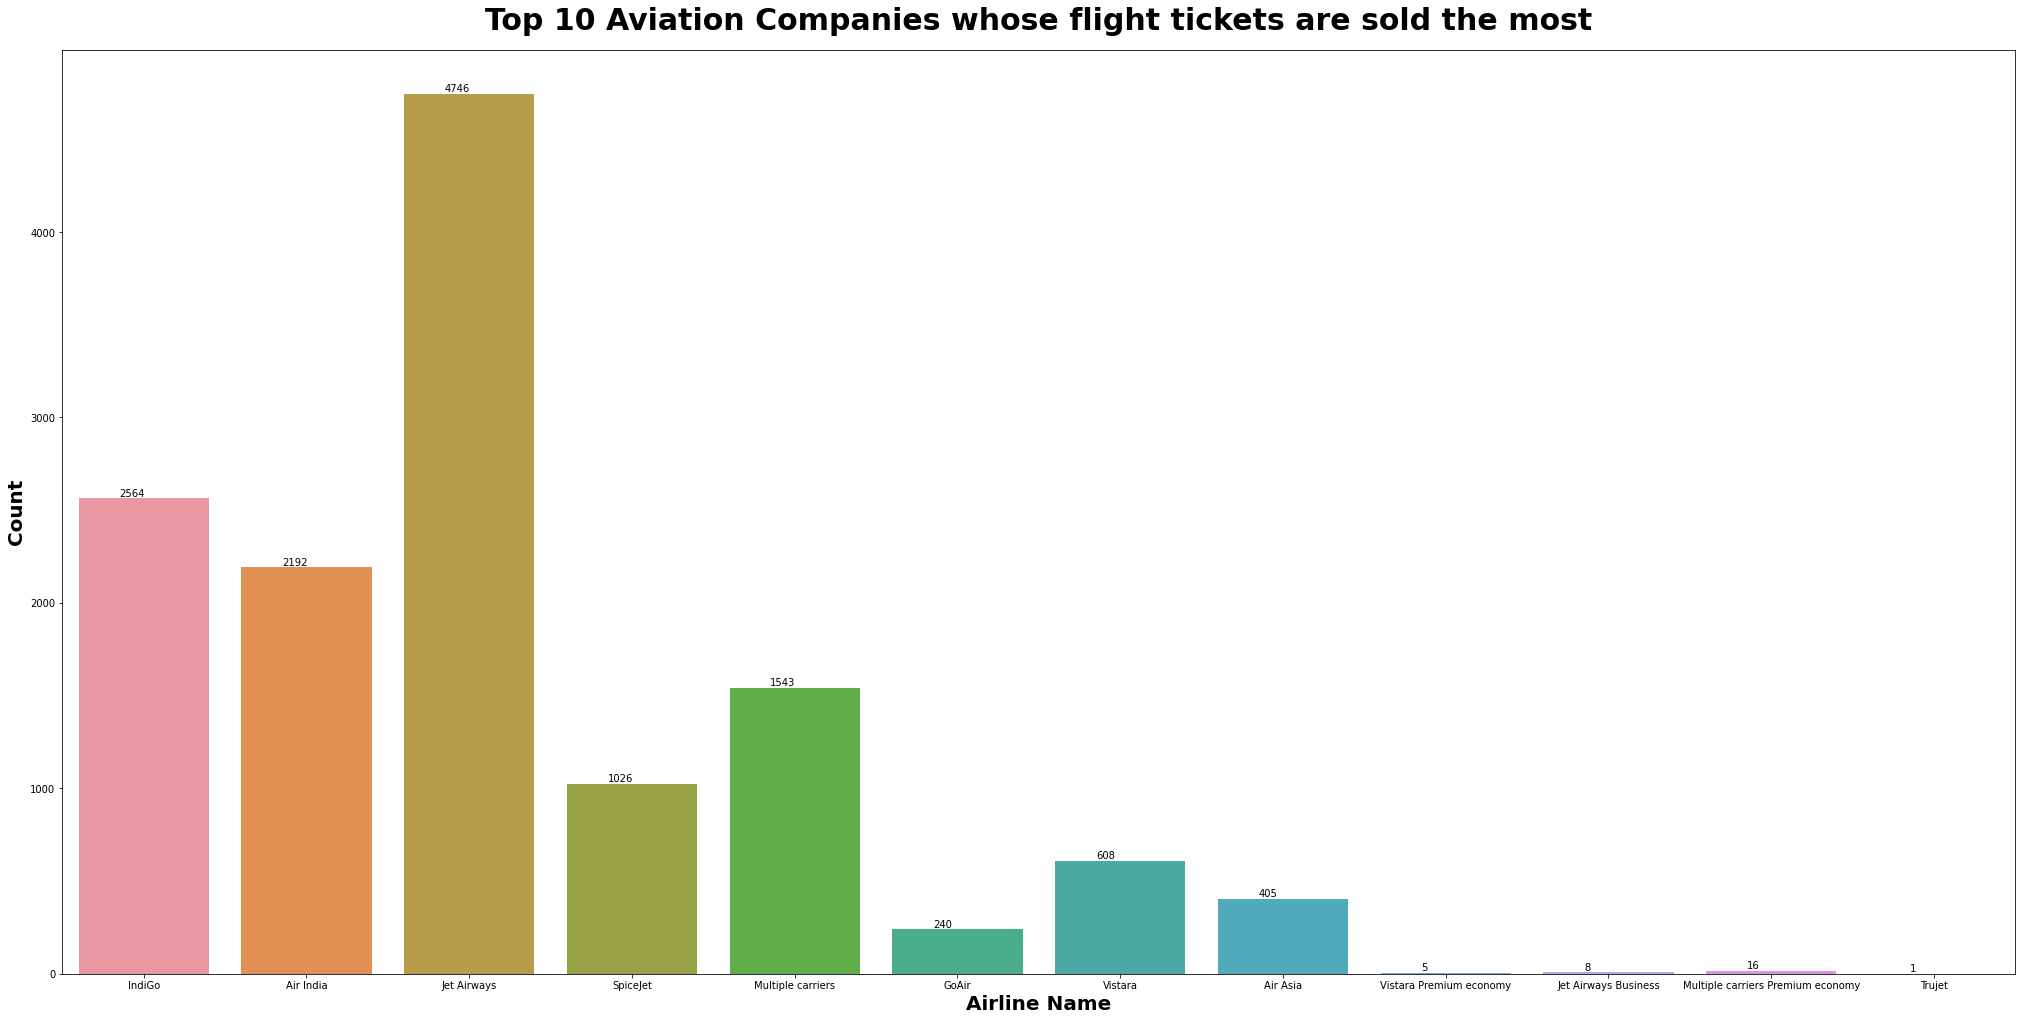

In [50]:
plt.figure(figsize=(35,17))
ax=sns.countplot(x='airline',data=final_df)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Airline Name", weight="bold", fontsize=20)
plt.title("Top 10 Aviation Companies whose flight tickets are sold the most", weight="bold",fontsize=30,pad=20)

for p, label in zip(ax.patches, final_df["airline"].value_counts().values):
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

In [51]:
airline_names = final_df.airline.value_counts().index[:8]

In [52]:
airline_val = final_df.airline.value_counts().values[:8]

([<matplotlib.patches.Wedge at 0x7fcd1039b130>,
 [Text(0.4802076328260656, 0.9896467194790203, 'Jet Airways'),
  Text(-1.0512028912745053, 0.32399456997937637, 'IndiGo'),
  Text(-0.7484977207179717, -0.8060714373304648, 'Air India'),
  Text(0.1450787913670109, -1.0903908218136686, 'Multiple carriers'),
  Text(0.7400951357442527, -0.8137930879822565, 'SpiceJet'),
  Text(0.9916758890630677, -0.47600307882509996, 'Vistara'),
  Text(1.076138218786255, -0.22787394337121325, 'Air Asia'),
  Text(1.0982392480315162, -0.062213777277789116, 'GoAir')],
 [Text(0.26193143608694486, 0.539807301534011, '35.62%'),
  Text(-0.5733833952406392, 0.17672431089784166, '19.24%'),
  Text(-0.4082714840279846, -0.43967532945298077, '16.45%'),
  Text(0.07913388620018776, -0.5947586300801828, '11.58%'),
  Text(0.4036882558605014, -0.44388713889941256, '7.70%'),
  Text(0.5409141213071278, -0.259638042995509, '4.56%'),
  Text(0.5869844829743208, -0.12429487820247995, '3.04%'),
  Text(0.5990395898353723, -0.03393478

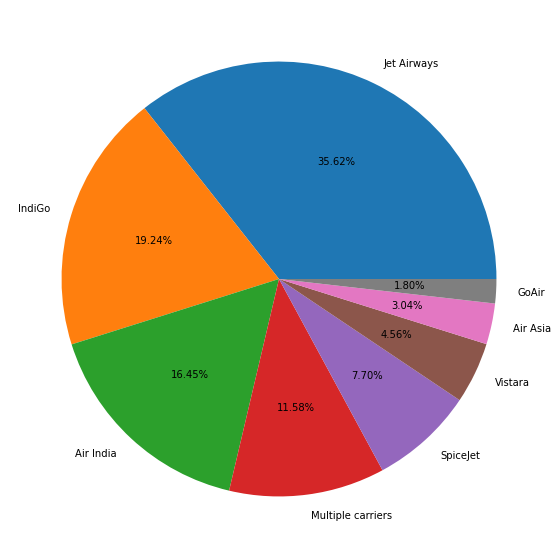

In [53]:
plt.figure(figsize=(20,10))
plt.pie(airline_val,labels=airline_names,autopct='%1.2f%%')

### Observation:
- Of the total flight tickets sold Jet Airways has the highest share which is 35.62% followed by Indigo and Air India.   

#### Q.2. Which month have most number of flights?

In [54]:
### why again you already did this step in data preparation - use clean and prepare dataframe
final_df['date']= final_df['date_of_journey'].apply(lambda x:x.split("/")[0])
final_df['month']= final_df['date_of_journey'].apply(lambda x:x.split("/")[1])
final_df['year']= final_df['date_of_journey'].apply(lambda x:x.split("/")[2])

In [55]:
## correct sort the graph by count or months - whichever look good

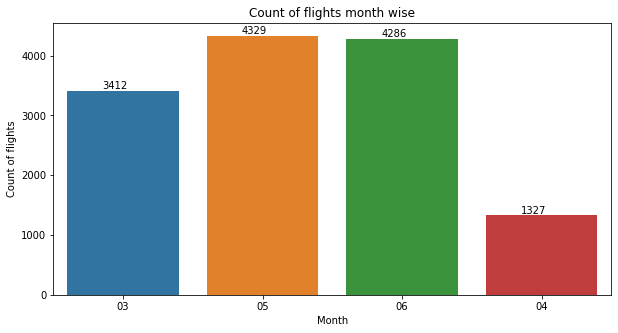

In [56]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'month', data = final_df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

### Observation:
- May has most number of flights followed by June and March.

#### Q.3. Which airline is most expensive?

In [57]:
## good

<Figure size 7200x360 with 0 Axes>

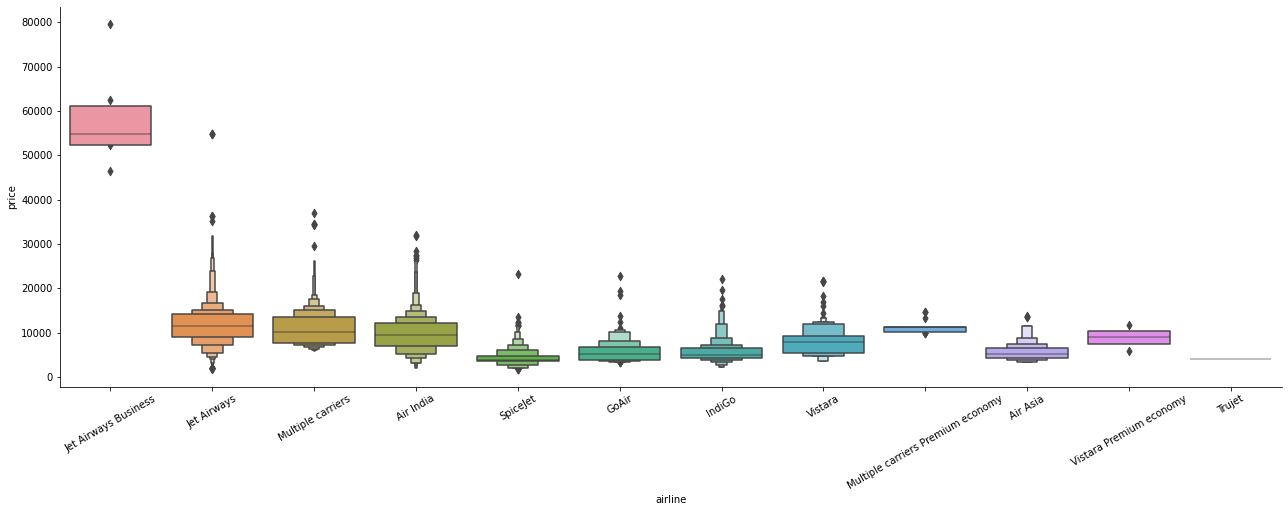

In [58]:
plt.figure(figsize = (100, 5))
sns.catplot(y = "price", x = "airline", data = final_df.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.xticks(rotation = 30)
plt.show()

### Observation:
 - Jet Airways Business has higher flight fares as compared to other Airlines, followed by Jet Airways and Multiple carriers.
 - Jet Airways has the most outliers in terms of price.
 
 #### explain more which like which jet airways have more outlier? why you think? and so one see graph and give more information?
 

#### Q.4 Which airline has boarded the most ?

In [59]:
### correct sort graph by number of passengers on boarded - rename title of y-axis not make sense

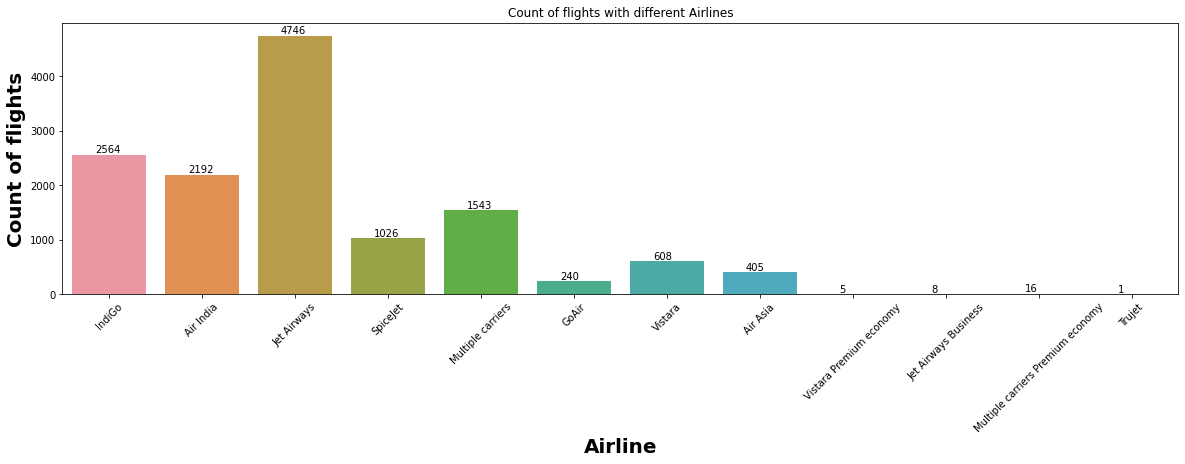

In [60]:
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'airline', data =final_df)
plt.xlabel('Airline',weight="bold", fontsize=20)
plt.ylabel('Count of flights',weight="bold", fontsize=20)
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

### Observation
- Jet Airways has most of the flights boarded followed by IndiGo and AirIndia.

#### Q.5 Which source will be having highest fare?

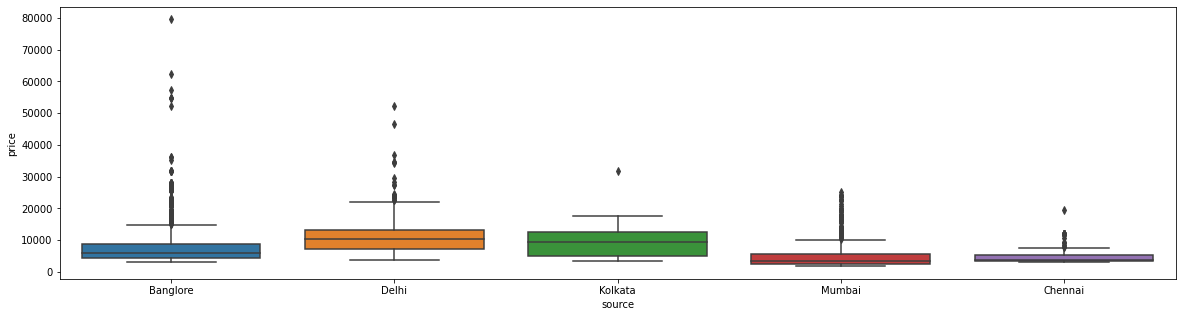

In [61]:
plt.figure(figsize = (20,5))
sns.boxplot(y = "price", x = "source", data = final_df.sort_values("price", ascending = False))
plt.show()

### Observation
 - Flights originating from banglore has high flight fares as compared to other sources ~from where flights are originating.~
 - Banglore as the source location has the most outliers while Chennai has the least.
 
 #### have room to explain more

### Q.6 Which destination will be having highest fare?

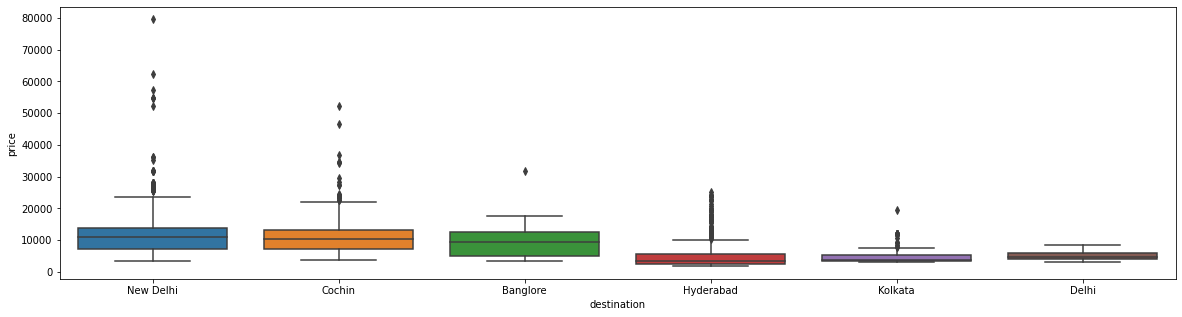

In [62]:
plt.figure(figsize = (20,5))
sns.boxplot(y = "price", x = "destination", data = final_df.sort_values("price", ascending = False))
plt.show()

### Observation:
 - Flights whose destination is New Delhi has highest fare compared to other flights whose destination is other than New Delhi.
 - New Delhi as the destination location has most of the outliers while Kolkata has the least.

### Conclusion - Results:

#### Q.1.Top 10 Aviation Companies whose flight tickets are sold the most ?

- Of the total flight tickets sold Jet Airways has the highest share followed by Indigo.

#### Q.2. Which month have most number of flights?

- May has most number of flights followed by June and March.

#### Q.3. Which airline is most expensive?

- Jet Airways Business has higher flight fares as compared to other Airlines, followed by Jet Airways and Multiple carriers.
- Jet Airways has the most outliers in terms of price.

#### Q.4 Which airline has boarded the most ?

- Jet Airways has most of the flights boarded followed by IndiGo and AirIndia.

#### Q.5 Which source will be having highest fare?

 - Flights originating from banglore has high flight fares as compared to other sources from where flights are originating.
 - Banglore as the source location has the most outliers while Chennai has the least.

#### Q.6 Which destination will be having highest fare?

 - Flights whose destination is New Delhi has highest fare compared to other flights whose destination is other than New Delhi.
 - New Delhi as the destination location has most of the outliers while Kolkata has the least.